# Visualising Data with Pandas and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date',parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [63]:
covid = pd.read_csv('data/covid19_cases.csv',index_col='dateRep',parse_dates=True).replace(
    'United_States_of_America', 'USA').sort_index()
covid.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Taiwan,TW,CNG1925,2.377388e+07,Asia,NaN
2019-12-31,31,12,2019,0,0,Georgia,GE,GEO,3.996762e+06,Europe,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,AZE,1.004772e+07,Europe,NaN
2019-12-31,31,12,2019,0,0,Norway,NO,NOR,5.328212e+06,Europe,NaN
2019-12-31,31,12,2019,27,0,China,CN,CHN,1.433784e+09,Asia,NaN


In [5]:
earthquake = pd.read_csv('data/earthquakes.csv')
earthquake.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


__Create the following visualizations using what you have learned up to this point in this
book. Use the data from this chapter's data/ directory:__


Plot the rolling 20-day minimum of the Facebook closing price using pandas.

<AxesSubplot:title={'center':'Rolling 20-day minimum of Facebook closing price'}, xlabel='date'>

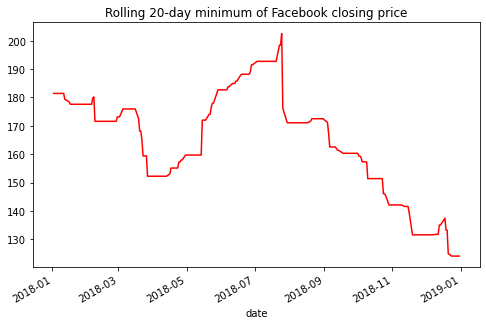

In [31]:
fb.close.rolling('20D').min().plot(figsize=(8, 5), style='-r',
    title='Rolling 20-day minimum of Facebook closing price')

Create a histogram and KDE of the change from open to close in the price of
Facebook stock.

Text(0.5, 0, 'Change in open to close price')

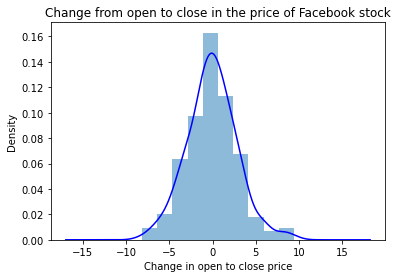

In [157]:
fig,ax = plt.subplots(1,1)
fb.assign(change = lambda x: x.open-x.close).change.plot(
    kind='hist', density=True, alpha = 0.5,
    title = 'Change from open to close in the price of Facebook stock')
fb.assign(change = lambda x: x.open-x.close).change.plot(
    kind='kde', color = 'b',
    title = 'Change from open to close in the price of Facebook stock')
plt.xlabel('Change in open to close price')

Using the earthquake data, create box plots for the magnitudes of each magType
used in Indonesia.

Text(0, 0.5, 'magnitude')

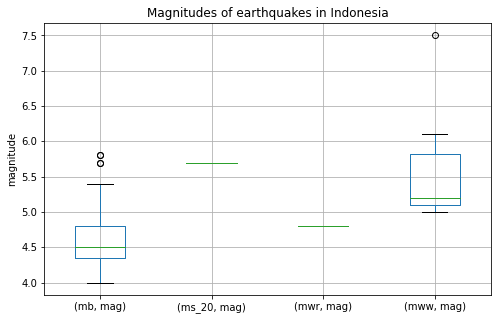

In [51]:
earthquake.query('parsed_place=="Indonesia"')[['mag','magType']].groupby('magType').boxplot(
    subplots = False,
    figsize = (8,5),
    )
plt.title('Magnitudes of earthquakes in Indonesia')
plt.ylabel('magnitude')

Make a line plot of the difference between the weekly maximum high price and the
weekly minimum low price for Facebook. This should be a single line.

<AxesSubplot:title={'center':'Max high price minus min low price for Facebook'}, xlabel='date'>

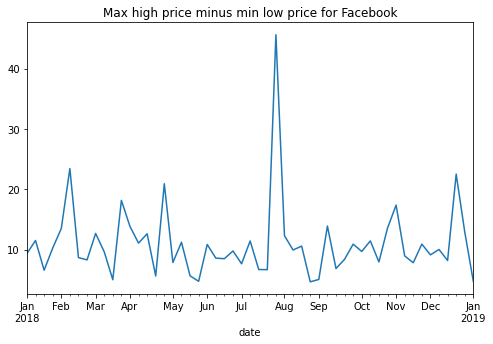

In [61]:
fb.resample('1W').agg({
    'high':'max',
    'low':'min'}).assign(diff = lambda x: x.high-x.low)['diff'].plot(
    figsize = (8,5),
    title = 'Max high price minus min low price for Facebook')

Plot the 14-day moving average of the daily change in new COVID-19 cases in
Brazil, China, India, Italy, Spain, and the USA:

a) First, use the diff() method that was introduced in the Working with time
series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the
day-over-day change in new cases. Then, use rolling() to calculate the 14-day
moving average.

b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil,
India, and the USA.

<AxesSubplot:xlabel='dateRep'>

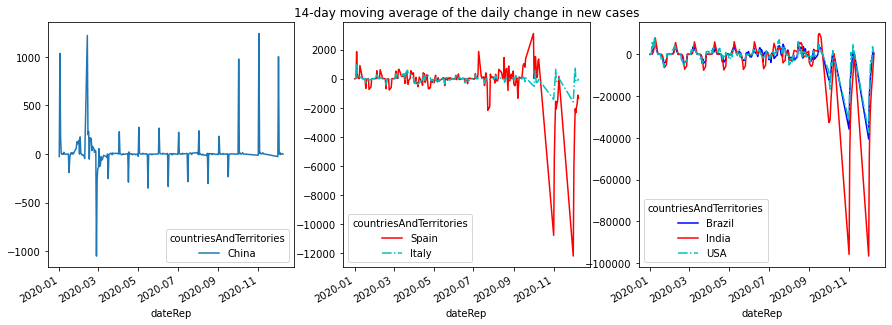

In [100]:
covidroll = covid.pivot_table(index='dateRep',columns=['countriesAndTerritories'],values='cases')\
    .diff().rolling('14D').mean()
fig,ax= plt.subplots(1,3,figsize=(15,5))
covidroll[['China']].plot(ax=ax[0])
covidroll[['Spain','Italy']].plot(
    title='14-day moving average of the daily change in new cases',
    ax=ax[1],style=['-r','-.c'])
covidroll[['Brazil','India','USA']].plot(
    ax=ax[2],style=['b','-r','-.c'])

Using matplotlib and pandas, create two subplots side-by-side showing the
effect that after-hours trading has had on Facebook's stock prices:

a) The first subplot will contain a line plot of the daily difference between that day's
opening price and the prior day's closing price (be sure to review the Working
with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an
easy way to do this).

b) The second subplot will be a bar plot showing the net effect this had monthly,
using resample().

c) Bonus #1: Color the bars according to whether there are gains in the stock price
(green) or drops in the stock price (red).

d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation
for the month.

Text(0, 0.5, 'Monthly after-hours change in price')

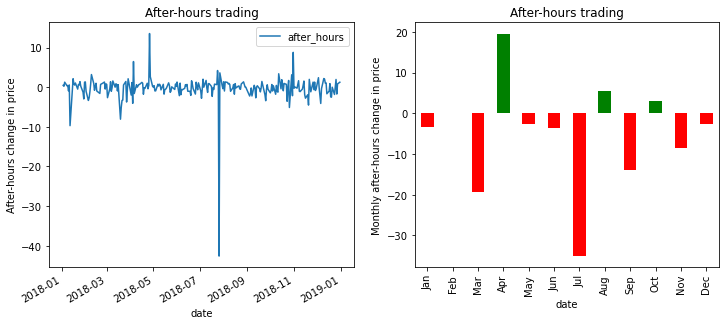

In [149]:
fig,ax= plt.subplots(1,2,figsize=(12,5))
fb.assign(after_hours = lambda x: x.open-x.close.shift())[['after_hours']].plot(
    title = 'After-hours trading',
    ax = ax[0])
ax[0].set_ylabel('After-hours change in price')
bar = fb.assign(after_hours = lambda x: x.open-x.close.shift())[['after_hours']].resample('1M').sum()
bar.index = bar.index.strftime('%b')
bar['after_hours'].plot(
    kind='bar',
    title = 'After-hours trading',
    color = np.where(bar['after_hours']>=0,'g','r'),
    ax = ax[1])
ax[1].set_ylabel('Monthly after-hours change in price')